## MOUNT

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/My Drive/MSc_project/.MAIN

Mounted at /content/drive
/content/drive/My Drive/MSc_project/.MAIN


In [ ]:
import os
os.chdir('G:\My Drive\MSc_project\.MAIN')


## analysis

In [29]:
import pandas as pd 
import pickle
import json
import os
import os.path
import numpy as np
import seaborn as sns
from collections import defaultdict
import joblib
import matplotlib.pyplot as plt
from matplotlib.ticker import (
                               FormatStrFormatter, 
                               AutoMinorLocator,
                               FuncFormatter,
                               )
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

import os


In [61]:
hashtag = 'avengers'

save_path_t = f'tweets/{hashtag}/{hashtag}_tweets_classified.pkl'


df = joblib.load(save_path_t)

df = df.drop(['text','user_id','grammartext','clean_text','text_len','punct','tokenized','nonstop','stemmed'], axis=1)

if 'grammar-sentence-score' in df.columns:
    df = df.drop(['grammar-sentence-score'], axis=1)

In [8]:
df.columns

Index(['text', 'text_word_count', 'polarity', 'subjectivity', 'gender',
       'num_male', 'num_female', 'sentiment', 'neg', 'neu', 'pos', 'compound',
       'grammar-word-score', 'Kincaid', 'ARI', 'Coleman-Liau',
       'FleschReadingEase', 'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX',
       'DaleChallIndex', 'complex_words', 'complex_words_dc', 'politeness',
       'offensive', 'topic', 'arts_&_culture', 'business_&_entrepreneurs',
       'celebrity_&_pop_culture', 'diaries_&_daily_life', 'family',
       'fashion_&_style', 'film_tv_&_video', 'fitness_&_health',
       'food_&_dining', 'gaming', 'learning_&_educational', 'music',
       'news_&_social_concern', 'other_hobbies', 'relationships',
       'science_&_technology', 'sports', 'travel_&_adventure',
       'youth_&_student_life', 'topic_single', 'pop_culture', 'daily_life',
       'sports_&_gaming', 'irony', 'emoji', 'joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust', 'hateful', 'targeted', 'aggressive'],
     

## Divide into Categorical or Continuous Data

In [77]:
# categorical data
cats =  ['gender', 'sentiment', 'topic', 'topic_single', 'irony', 'emoji' ]

# cateogrical df
cdf = df[cats]

# scores df
sdf = df.drop(cats,axis=1)

## Categorical Data!!!

In [71]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2494 entries, 1555684437077430272 to 142963564
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        2288 non-null   float64
 1   sentiment     2450 non-null   object 
 2   topic         2450 non-null   float64
 3   topic_single  2450 non-null   float64
 4   irony         2450 non-null   float64
 5   emoji         2450 non-null   float64
dtypes: float64(5), object(1)
memory usage: 136.4+ KB


Male      0.581294
Female    0.418706
Name: gender, dtype: float64


C:\Users\berke\AppData\Local\Temp\ipykernel_10488\3885767587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(0,'Female',inplace=True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\3885767587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(1,'Male',inplace=True)


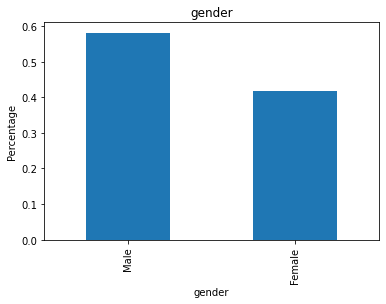

In [78]:
cols = cdf.columns.tolist()

cdf.gender.replace(0,'Female',inplace=True)
cdf.gender.replace(1,'Male',inplace=True)

col = cols[0]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = col, xlabel = col, ylabel= 'Percentage')
plt.show()

positive    0.746531
neutral     0.133061
negative    0.120408
Name: sentiment, dtype: float64


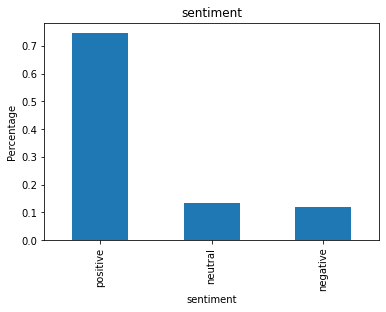

In [64]:
cols = cdf.columns.tolist()

col = cols[1]


print(cdf[col].value_counts(normalize=True)) 
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = col, xlabel = col, ylabel= 'Percentage')
plt.show()

C:\Users\berke\AppData\Local\Temp\ipykernel_10488\1285843972.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.topic.replace(0, 'arts & culture' , inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\1285843972.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.topic.replace(5, 'fashion & style' , inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\1285843972.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

film tv & video             0.686939
 news & social concern      0.222041
 sports                     0.024490
gaming                      0.023673
arts & culture              0.014694
celebrity & pop culture     0.006939
diaries & daily life\t      0.004898
business & entrepreneurs    0.004898
 music                      0.004082
food & dining               0.002449
fashion & style             0.002041
relationships               0.001224
 science & technology       0.001224
 other hobbies              0.000408
Name: topic, dtype: float64


c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


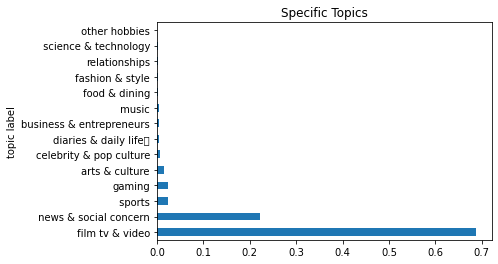

In [105]:
cols = cdf.columns.tolist()


col = cols[2]


cdf.topic.replace(0, 'arts & culture' , inplace = True)
cdf.topic.replace(5, 'fashion & style' , inplace = True)
cdf.topic.replace(10, ' learning & educational' , inplace = True)
cdf.topic.replace(15, ' science & technology' , inplace = True)
cdf.topic.replace(1, 'business & entrepreneurs' , inplace = True)
cdf.topic.replace(6, 'film tv & video' , inplace = True)
cdf.topic.replace(11, ' music' , inplace = True)
cdf.topic.replace(16, ' sports' , inplace = True)
cdf.topic.replace(2, 'celebrity & pop culture' , inplace = True)
cdf.topic.replace(7, 'fitness & health' , inplace = True)
cdf.topic.replace(12, ' news & social concern' , inplace = True)
cdf.topic.replace(17, ' travel & adventure' , inplace = True)
cdf.topic.replace(3, 'diaries & daily life	' , inplace = True)
cdf.topic.replace(8, 'food & dining' , inplace = True)
cdf.topic.replace(13, ' other hobbies' , inplace = True)
cdf.topic.replace(18, ' youth & student life', inplace = True)
cdf.topic.replace(4, 'family' , inplace = True)
cdf.topic.replace(14, 'relationships' , inplace = True)
cdf.topic.replace(9, 'gaming' , inplace = True)


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'barh', title = 'Specific Topics', xlabel = col+' label', ylabel= 'Percentage')
plt.show()

In [ ]:
cols = cdf.columns.tolist()

cdf.topic_single.replace(0, 'arts_&_culture', inplace = True) 
cdf.topic_single.replace(1, 'business_&_entrepreneurs', inplace = True) 
cdf.topic_single.replace(2, 'pop_culture', inplace = True) 
cdf.topic_single.replace(3, 'daily_life', inplace = True) 
cdf.topic_single.replace(4, 'sports_&_gaming', inplace = True) 
cdf.topic_single.replace(5, 'science_&_technology', inplace = True) 

col = cols[3]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = 'General Topics', xlabel = col, ylabel= 'Percentage', rot=8)
plt.show()


0.0    0.979184
1.0    0.020816
Name: irony, dtype: float64


C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2757287860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(0,'Non-Ironic',inplace=True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2757287860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(1,'Ironic',inplace=True)


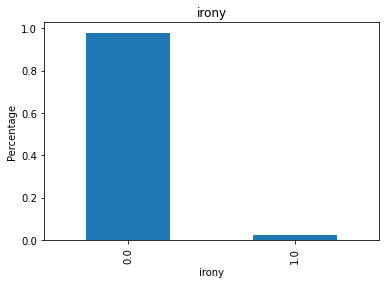

In [82]:
cols = cdf.columns.tolist()

cdf.gender.replace(0,'Non-Ironic',inplace=True)
cdf.gender.replace(1,'Ironic',inplace=True)

col = cols[4]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = col, xlabel = col, ylabel= 'Percentage')
plt.show()

4.0     0.423673
7.0     0.153878
2.0     0.113878
6.0     0.089796
1.0     0.082041
0.0     0.080000
10.0    0.039184
14.0    0.005714
5.0     0.004898
11.0    0.003673
13.0    0.000816
16.0    0.000816
8.0     0.000408
3.0     0.000408
15.0    0.000408
9.0     0.000408
Name: emoji, dtype: float64


C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2448465951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(0,'Non-Ironic',inplace=True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2448465951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(1,'Ironic',inplace=True)


<AxesSubplot:title={'center':'emoji'}, xlabel='emoji', ylabel='Percentage'>

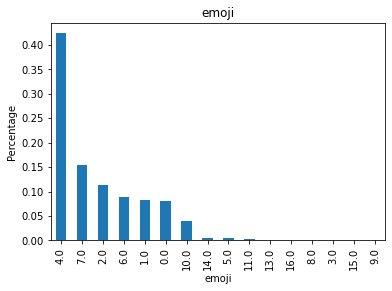

In [55]:
cols = cdf.columns.tolist()

cdf.gender.replace(0,'Non-Ironic',inplace=True)
cdf.gender.replace(1,'Ironic',inplace=True)

col = cols[5]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = col, xlabel = col, ylabel= 'Percentage')

## Continuous

In [83]:
sdf.columns

Index(['text_word_count', 'polarity', 'subjectivity', 'num_male', 'num_female',
       'neg', 'neu', 'pos', 'compound', 'grammar-word-score', 'Kincaid', 'ARI',
       'Coleman-Liau', 'FleschReadingEase', 'GunningFogIndex', 'LIX',
       'SMOGIndex', 'RIX', 'DaleChallIndex', 'complex_words',
       'complex_words_dc', 'politeness', 'offensive', 'arts_&_culture',
       'business_&_entrepreneurs', 'celebrity_&_pop_culture',
       'diaries_&_daily_life', 'family', 'fashion_&_style', 'film_tv_&_video',
       'fitness_&_health', 'food_&_dining', 'gaming', 'learning_&_educational',
       'music', 'news_&_social_concern', 'other_hobbies', 'relationships',
       'science_&_technology', 'sports', 'travel_&_adventure',
       'youth_&_student_life', 'pop_culture', 'daily_life', 'sports_&_gaming',
       'joy', 'sadness', 'others', 'anger', 'surprise', 'disgust', 'hateful',
       'targeted', 'aggressive'],
      dtype='object')

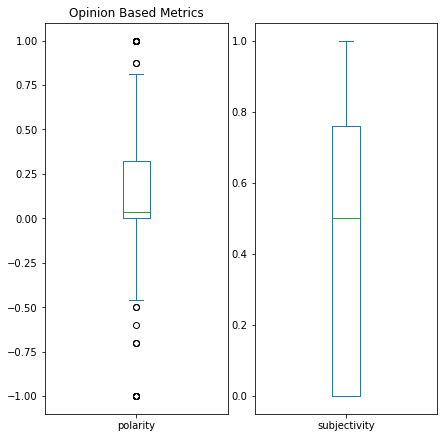

In [97]:

plt.subplot(131)
sdf['polarity'].plot( kind = 'box', title = 'Opinion Based Metrics', figsize=(9,6))
plt.tight_layout(pad=0.4)
plt.subplot(132)
sdf['subjectivity'].plot.box()
plt.tight_layout(pad=0.4)
plt.show()

ValueError: plot kind scatter can only be used for data frames

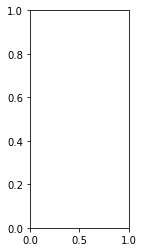

In [106]:

plt.subplot(131)
sdf['neg'].plot( kind = '', title = 'Opinion Based Metrics', figsize=(9,6))
plt.tight_layout(pad=0.4)
plt.subplot(132)
sdf['neu'].plot.box()
plt.tight_layout(pad=0.4)
plt.subplot(133)
sdf['pos'].plot.box()
plt.tight_layout(pad=0.4)
plt.show()

